<a href="https://colab.research.google.com/github/Sanaghufan/Computer-Vision-and-Deep-Learning-Projects/blob/main/NumberPlateDetectionUsingYOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image


import os
HOME = os.getcwd()


HOME

'/content'

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d5ccc5d21a75319d338f18ecafac307a06475c3934c33d13c17e2c62aad13eae
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall

In [5]:



from roboflow import Roboflow
rf = Roboflow(api_key="5lL5pOZ9Zdps0nyD2SSW")
project = rf.workspace("iambeginner").project("testingplate")
dataset = project.version(4).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to testingplate-4 in yolov8:: 100%|██████████| 2184/2184 [00:00<00:00, 4288.79it/s]


In [10]:
%cd {HOME}
model = YOLO('yolov8n.pt')
# Train the model
model.train(data="/content/datasets/testingplate-4/data.yaml", epochs=10, imgsz=448,plots = True)


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/testingplate-4/data.yaml, epochs=10, patience=50, batch=16, imgsz=448, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, s

/content


 21                  -1  1    493056  ultralytics.nn.modules.C2f                   [384, 256, 1]                 
 22        [15, 18, 21]  1    751507  ultralytics.nn.modules.Detect                [1, [64, 128, 256]]           
Model summary: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias
train: Scanning /content/datasets/testingplate-4/train/labels.cache... 946 images, 0 backgrounds, 0 corrupt: 100%|██████████| 946/946 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 367, len(boxes) = 966. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, cli

In [13]:
metrics = model.val()  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/datasets/testingplate-4/valid/labels.cache... 95 images, 0 backgrounds, 0 corrupt: 100%|██████████| 95/95 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 55, len(boxes) = 97. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]
                   all         95         97      0.966      0.969      0.991      0.769
Speed: 2.3ms pre-process, 3.8ms inference, 0.0ms loss, 4.3ms post-process per image


/content


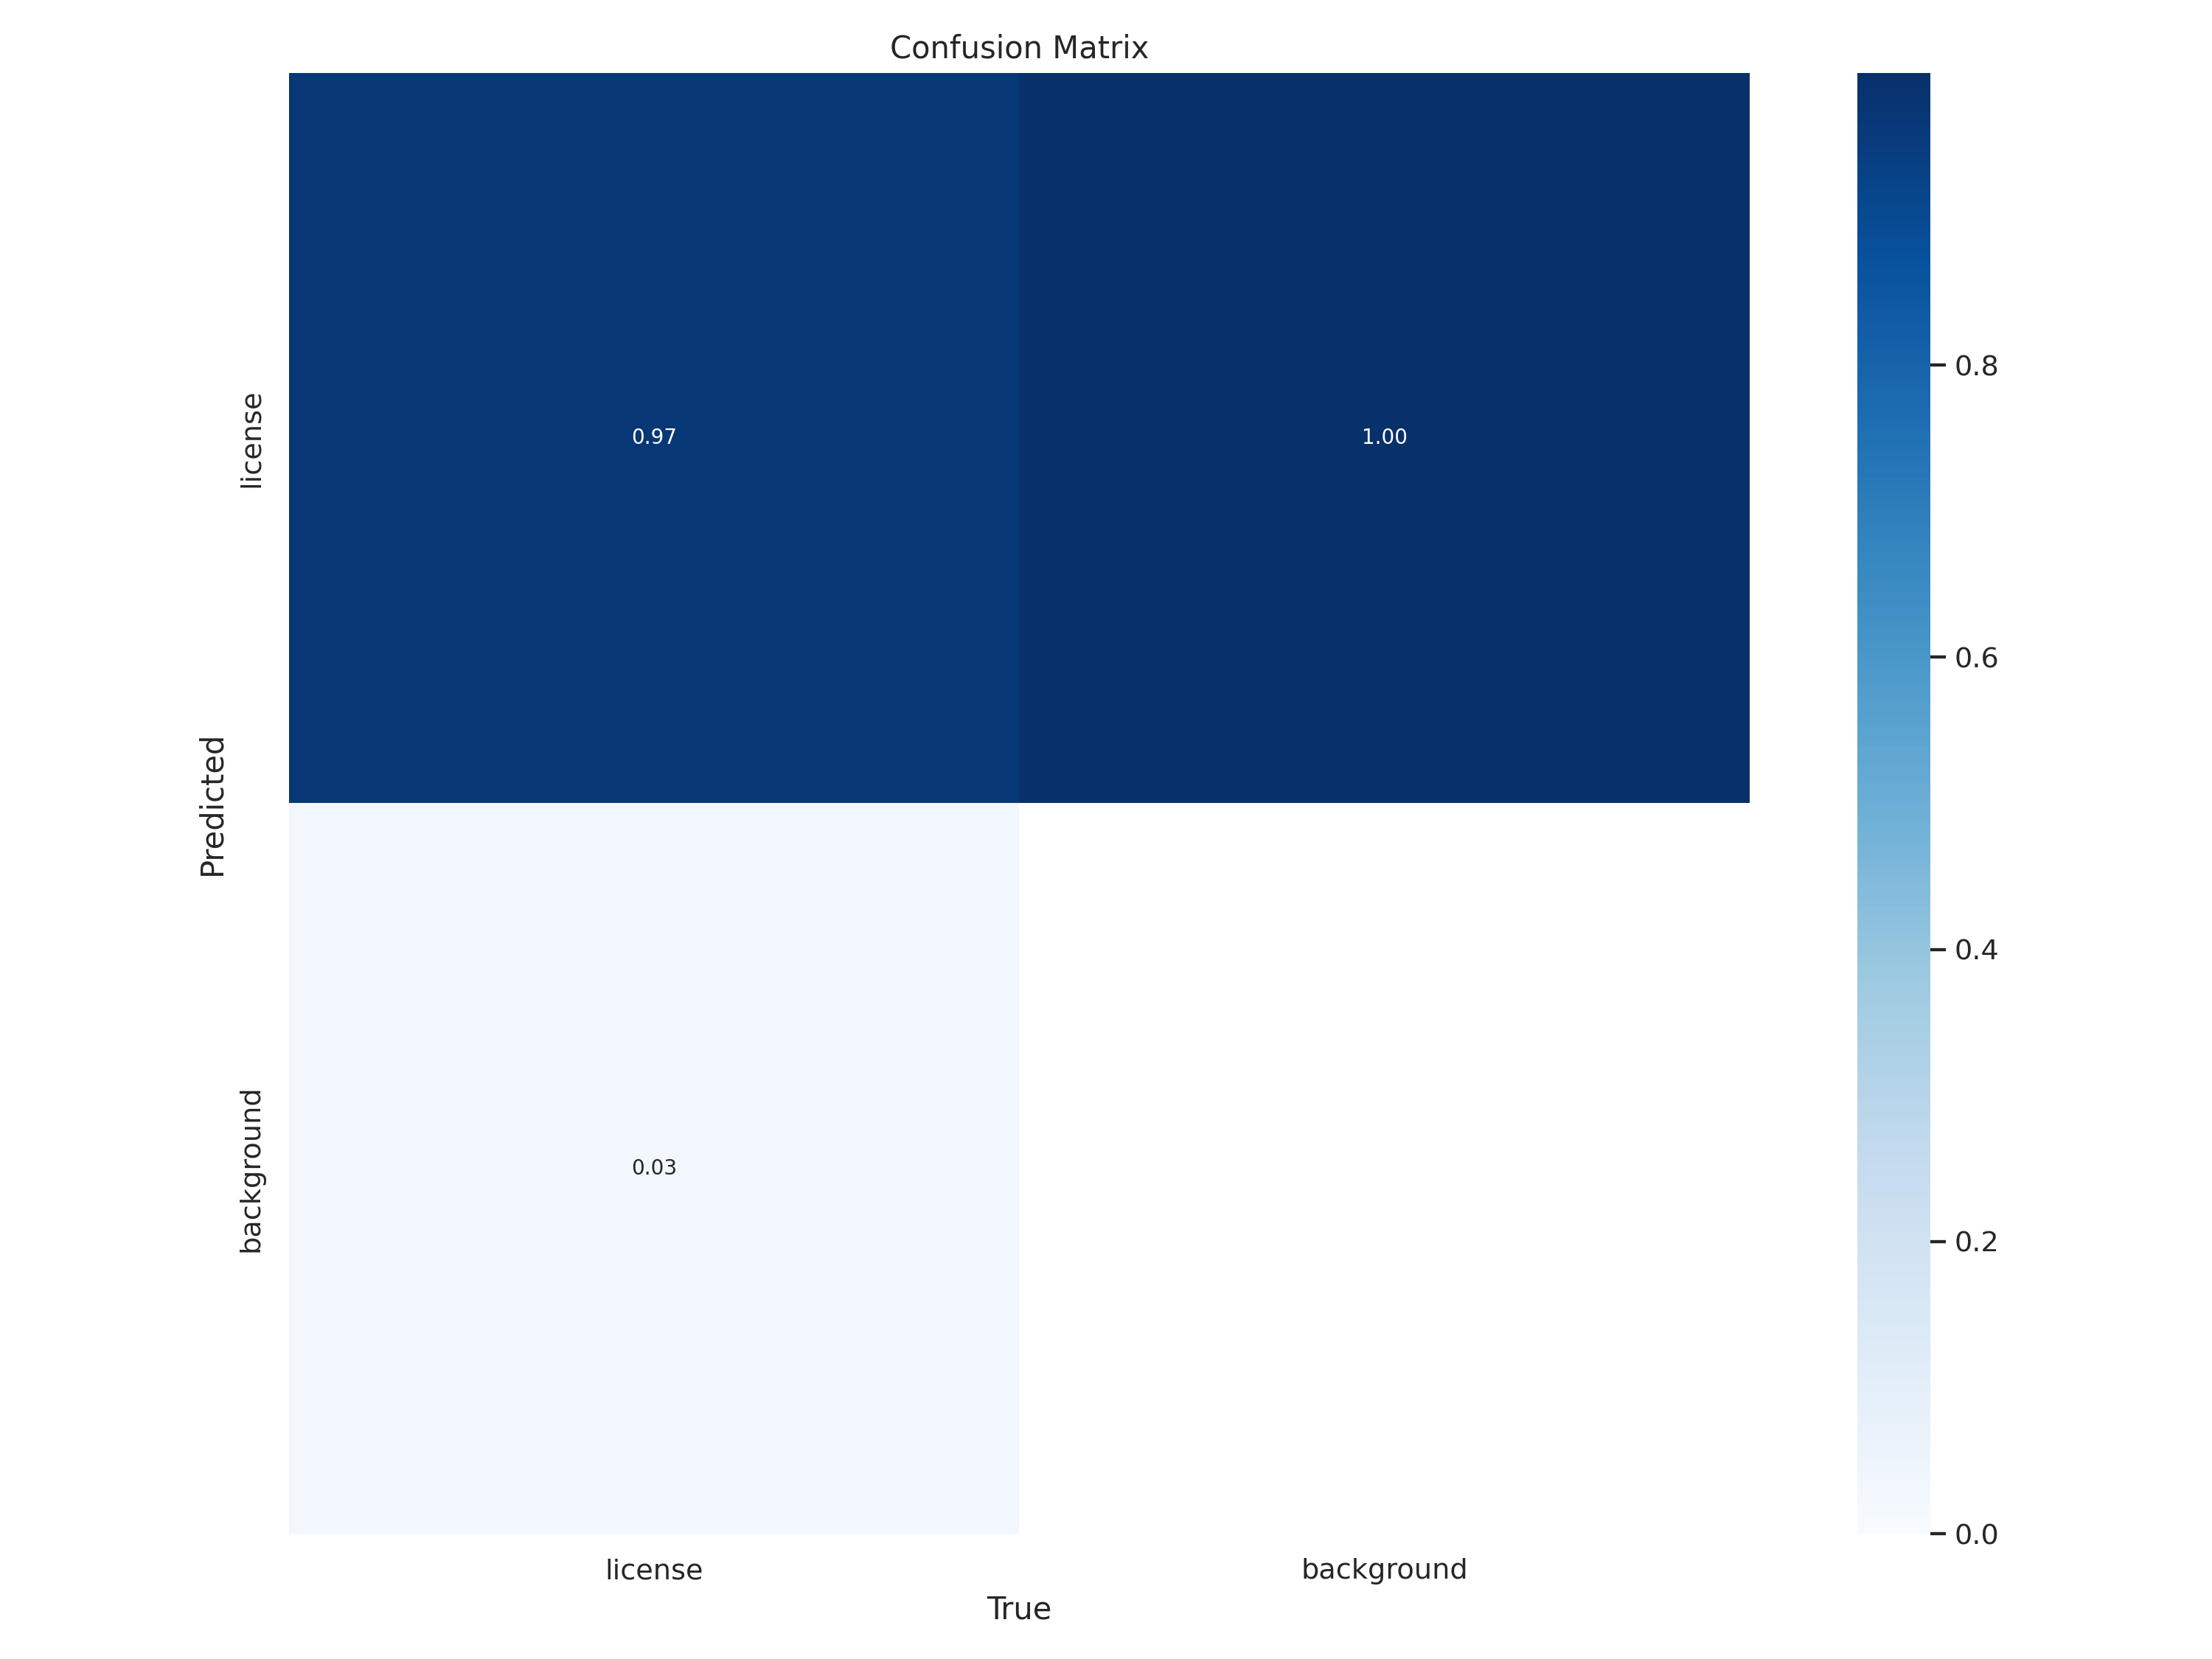

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=500)

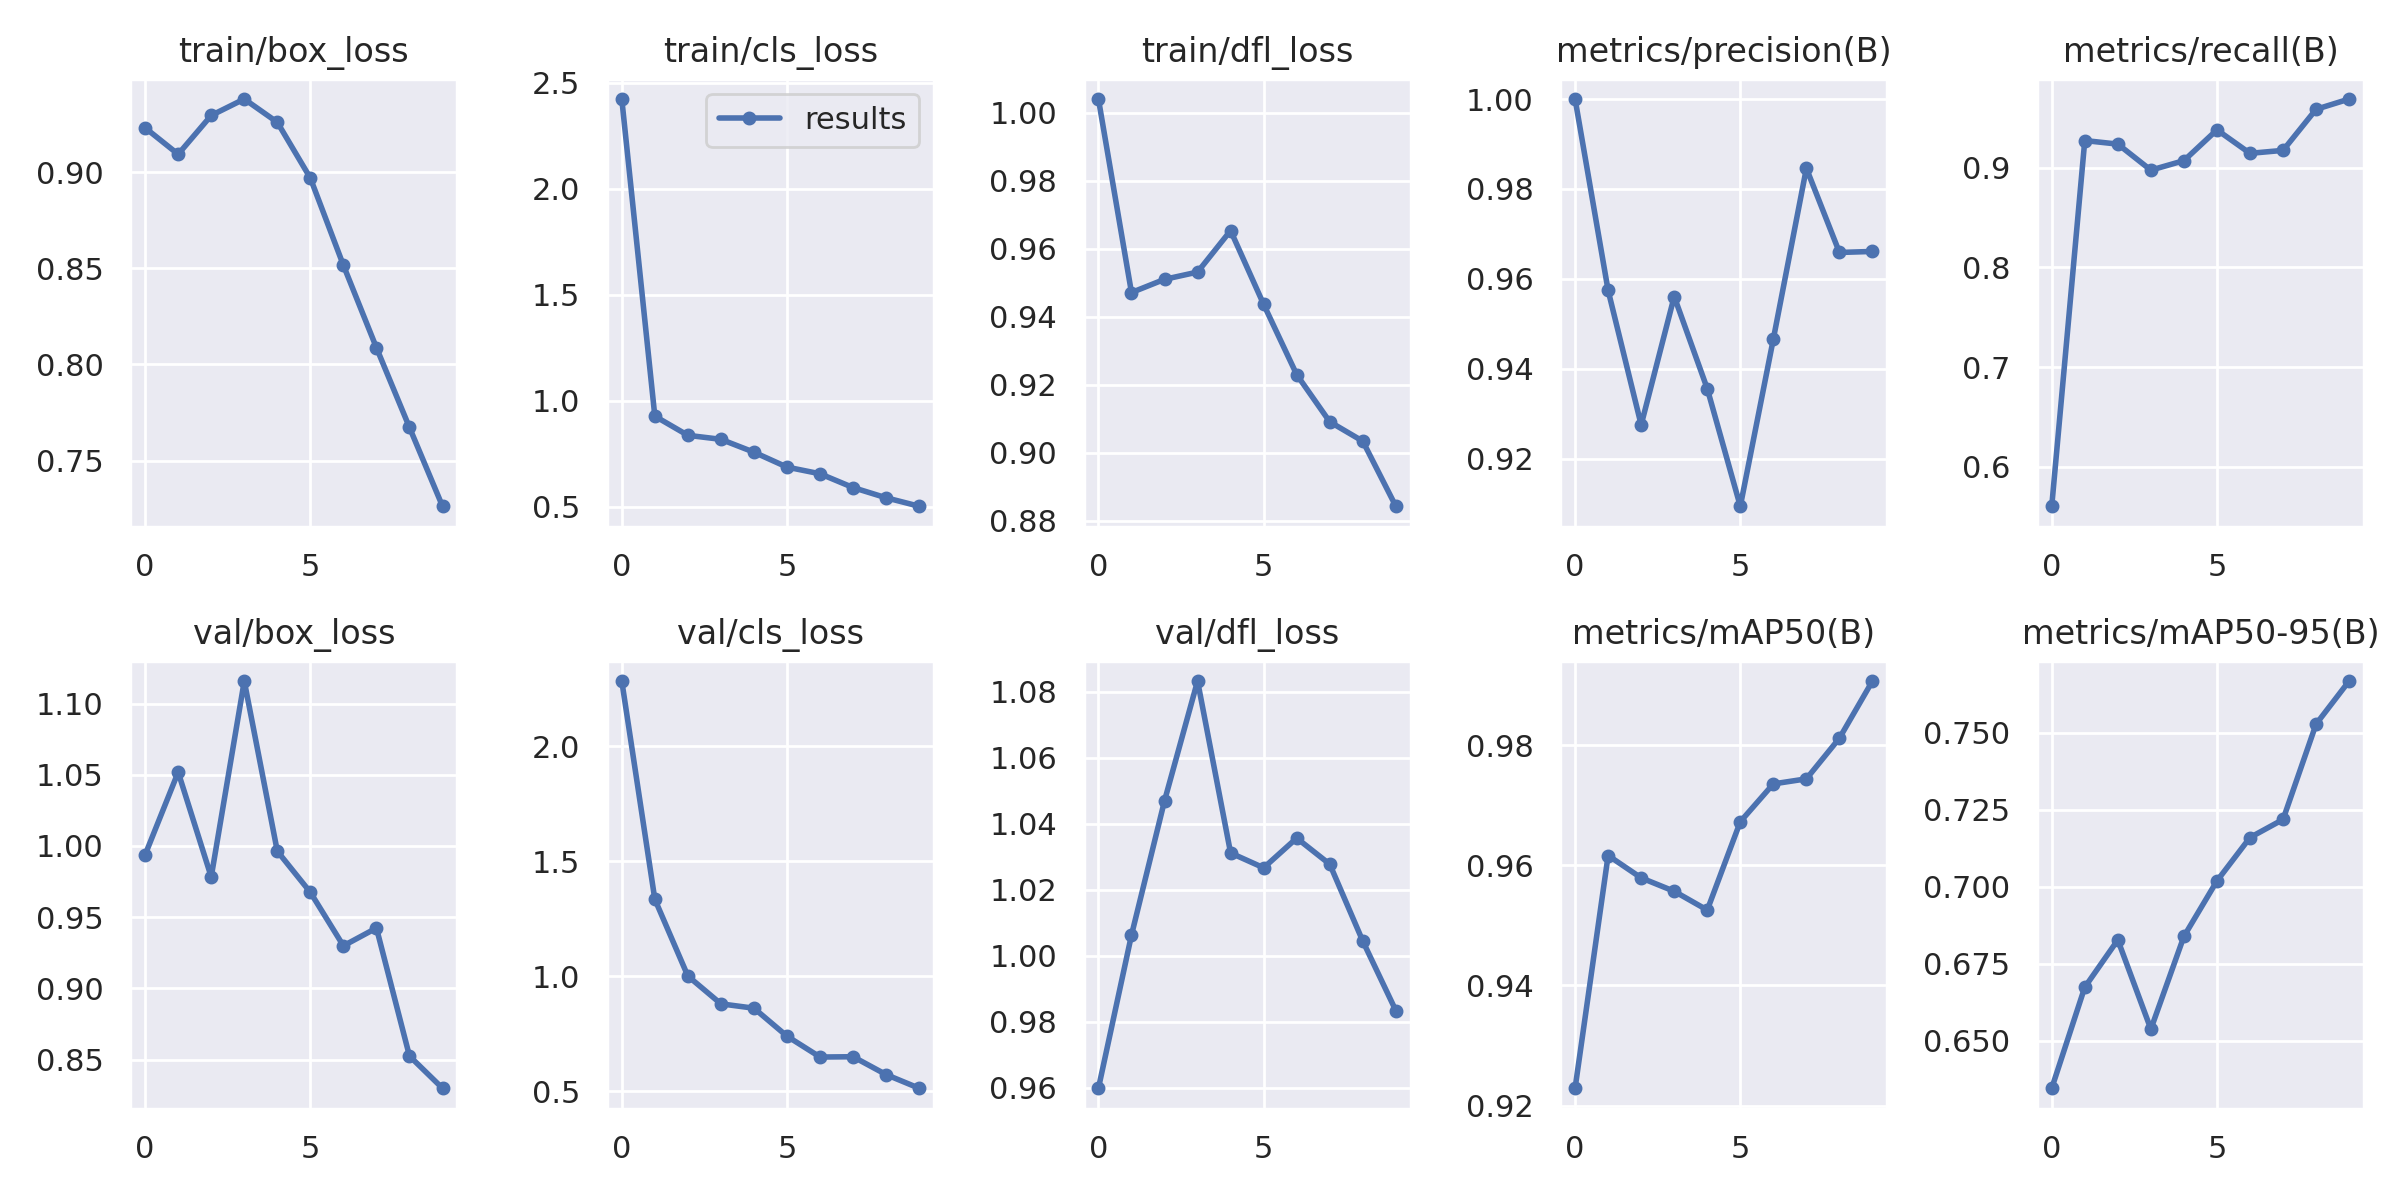

In [16]:
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=500)

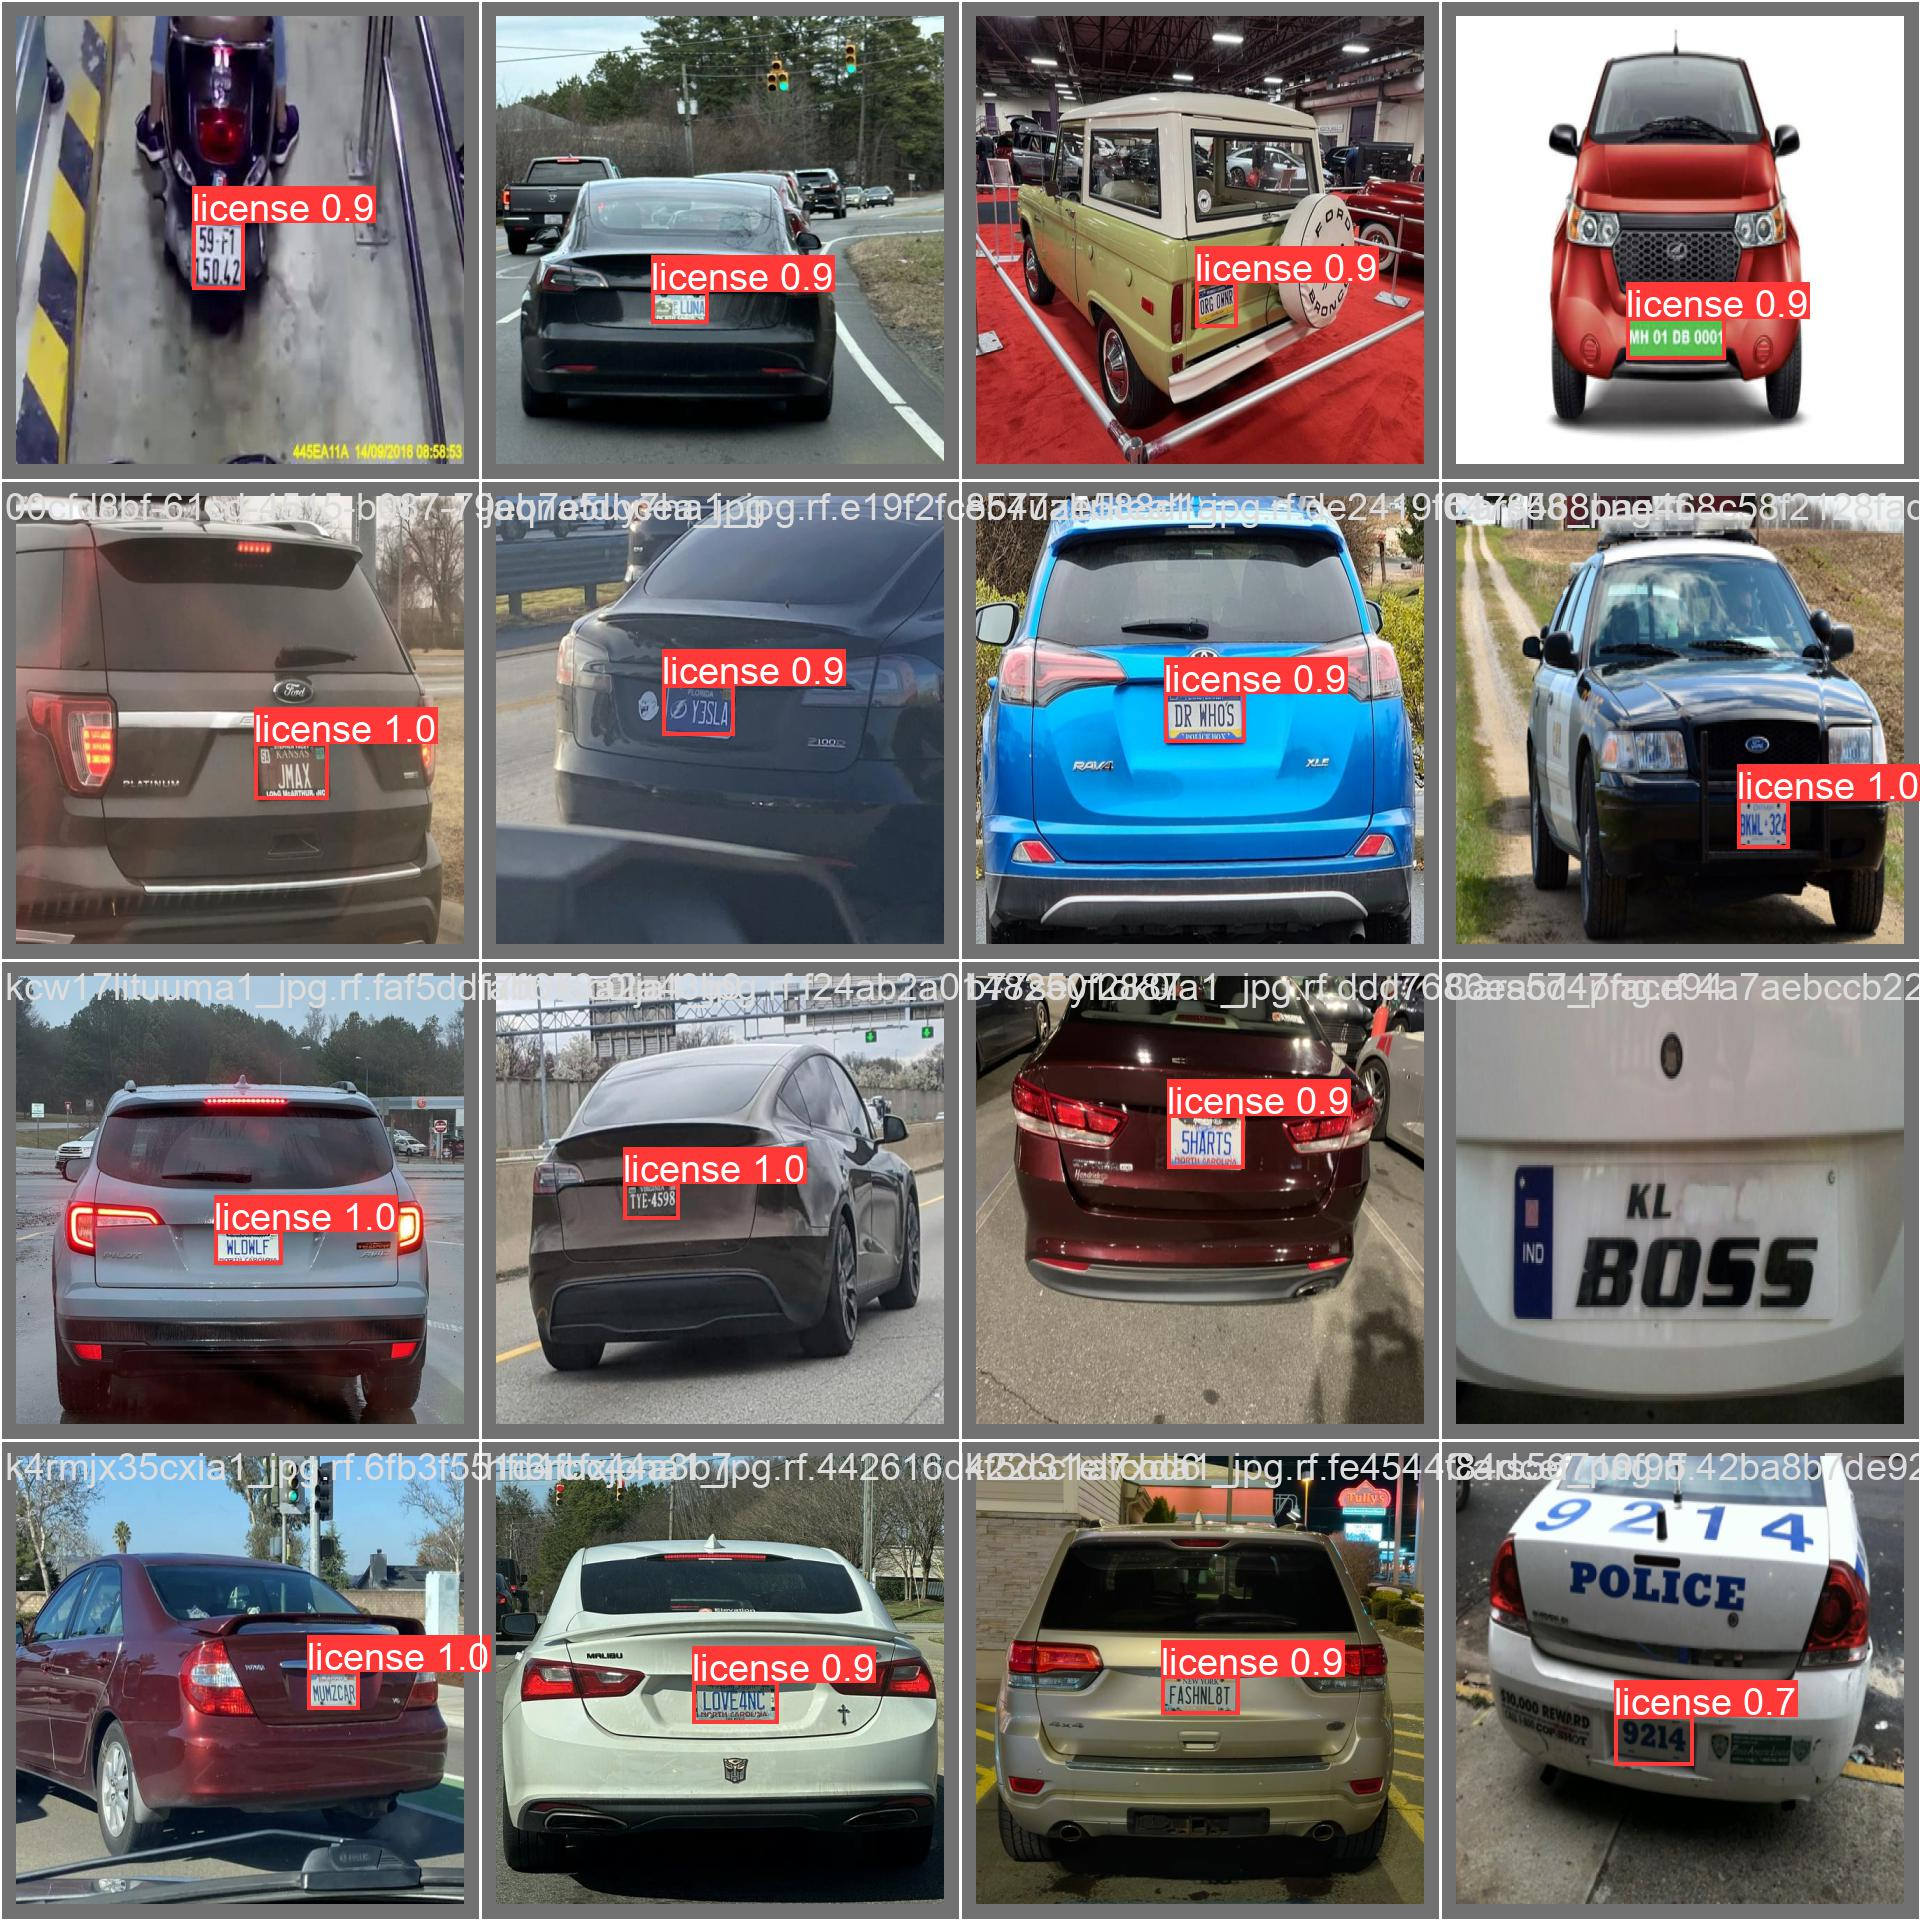

In [17]:
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=500)

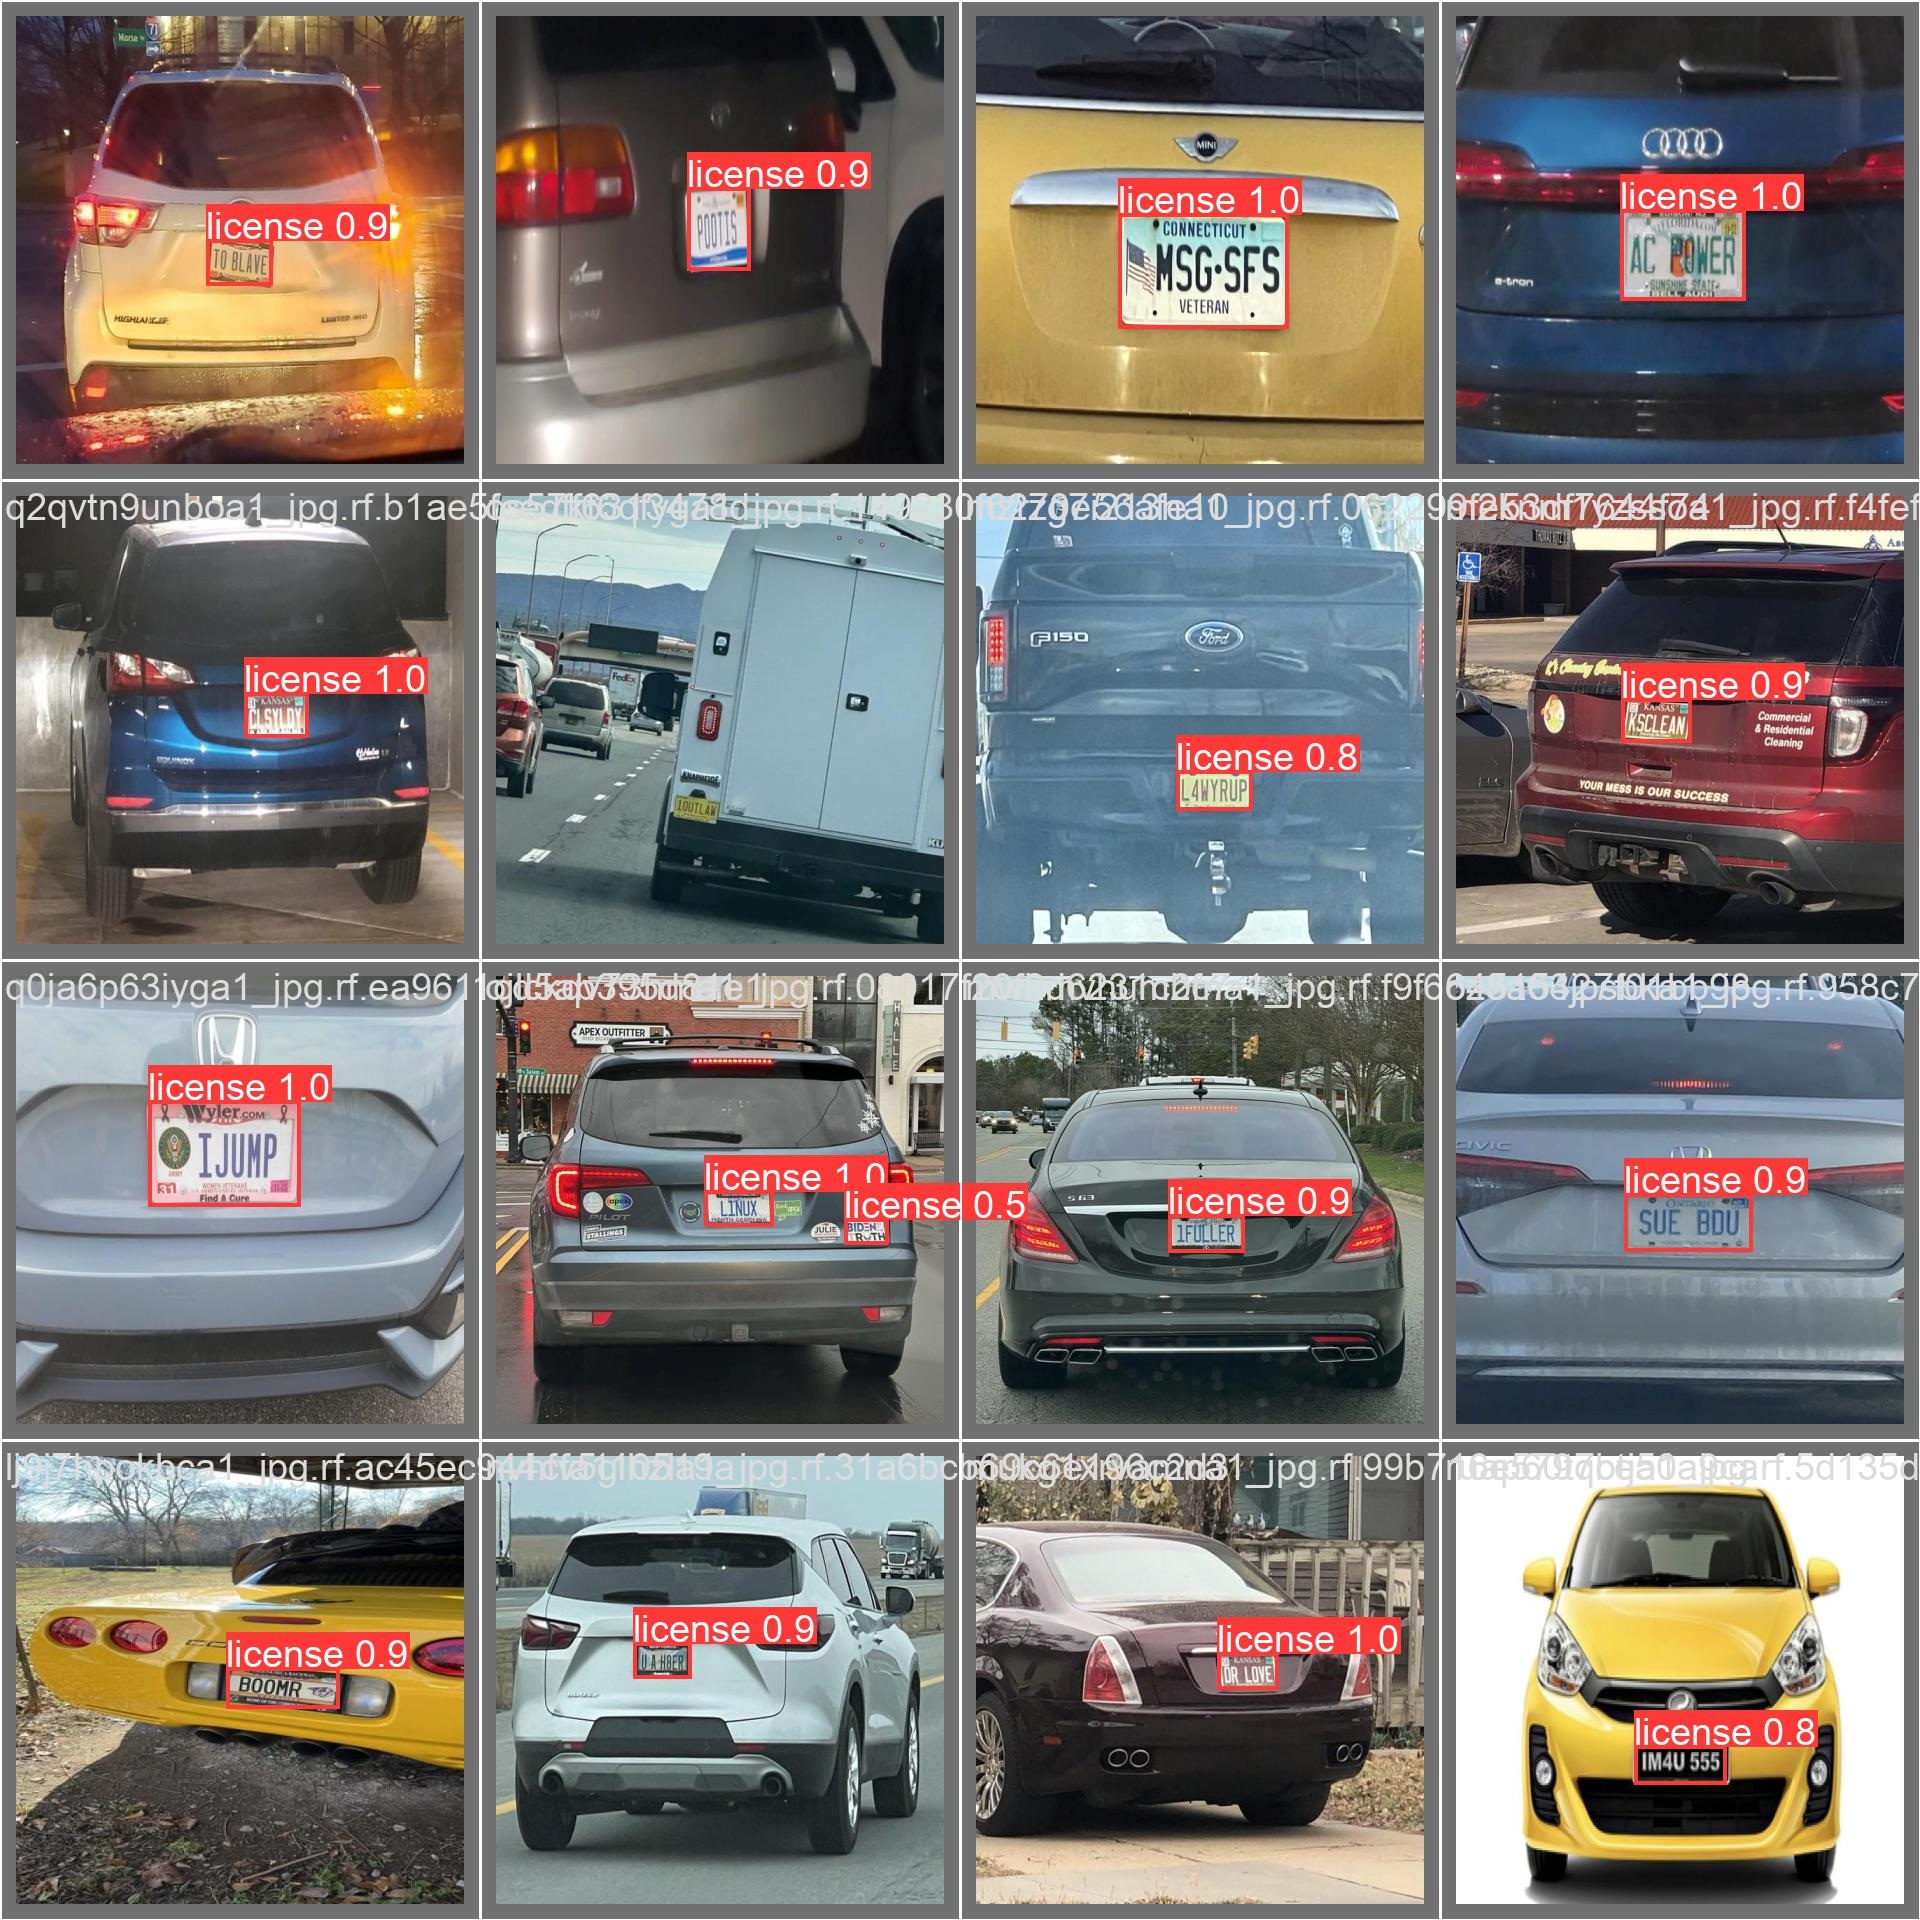

In [18]:
Image(filename=f'{HOME}/runs/detect/train3/val_batch1_pred.jpg', width=500)

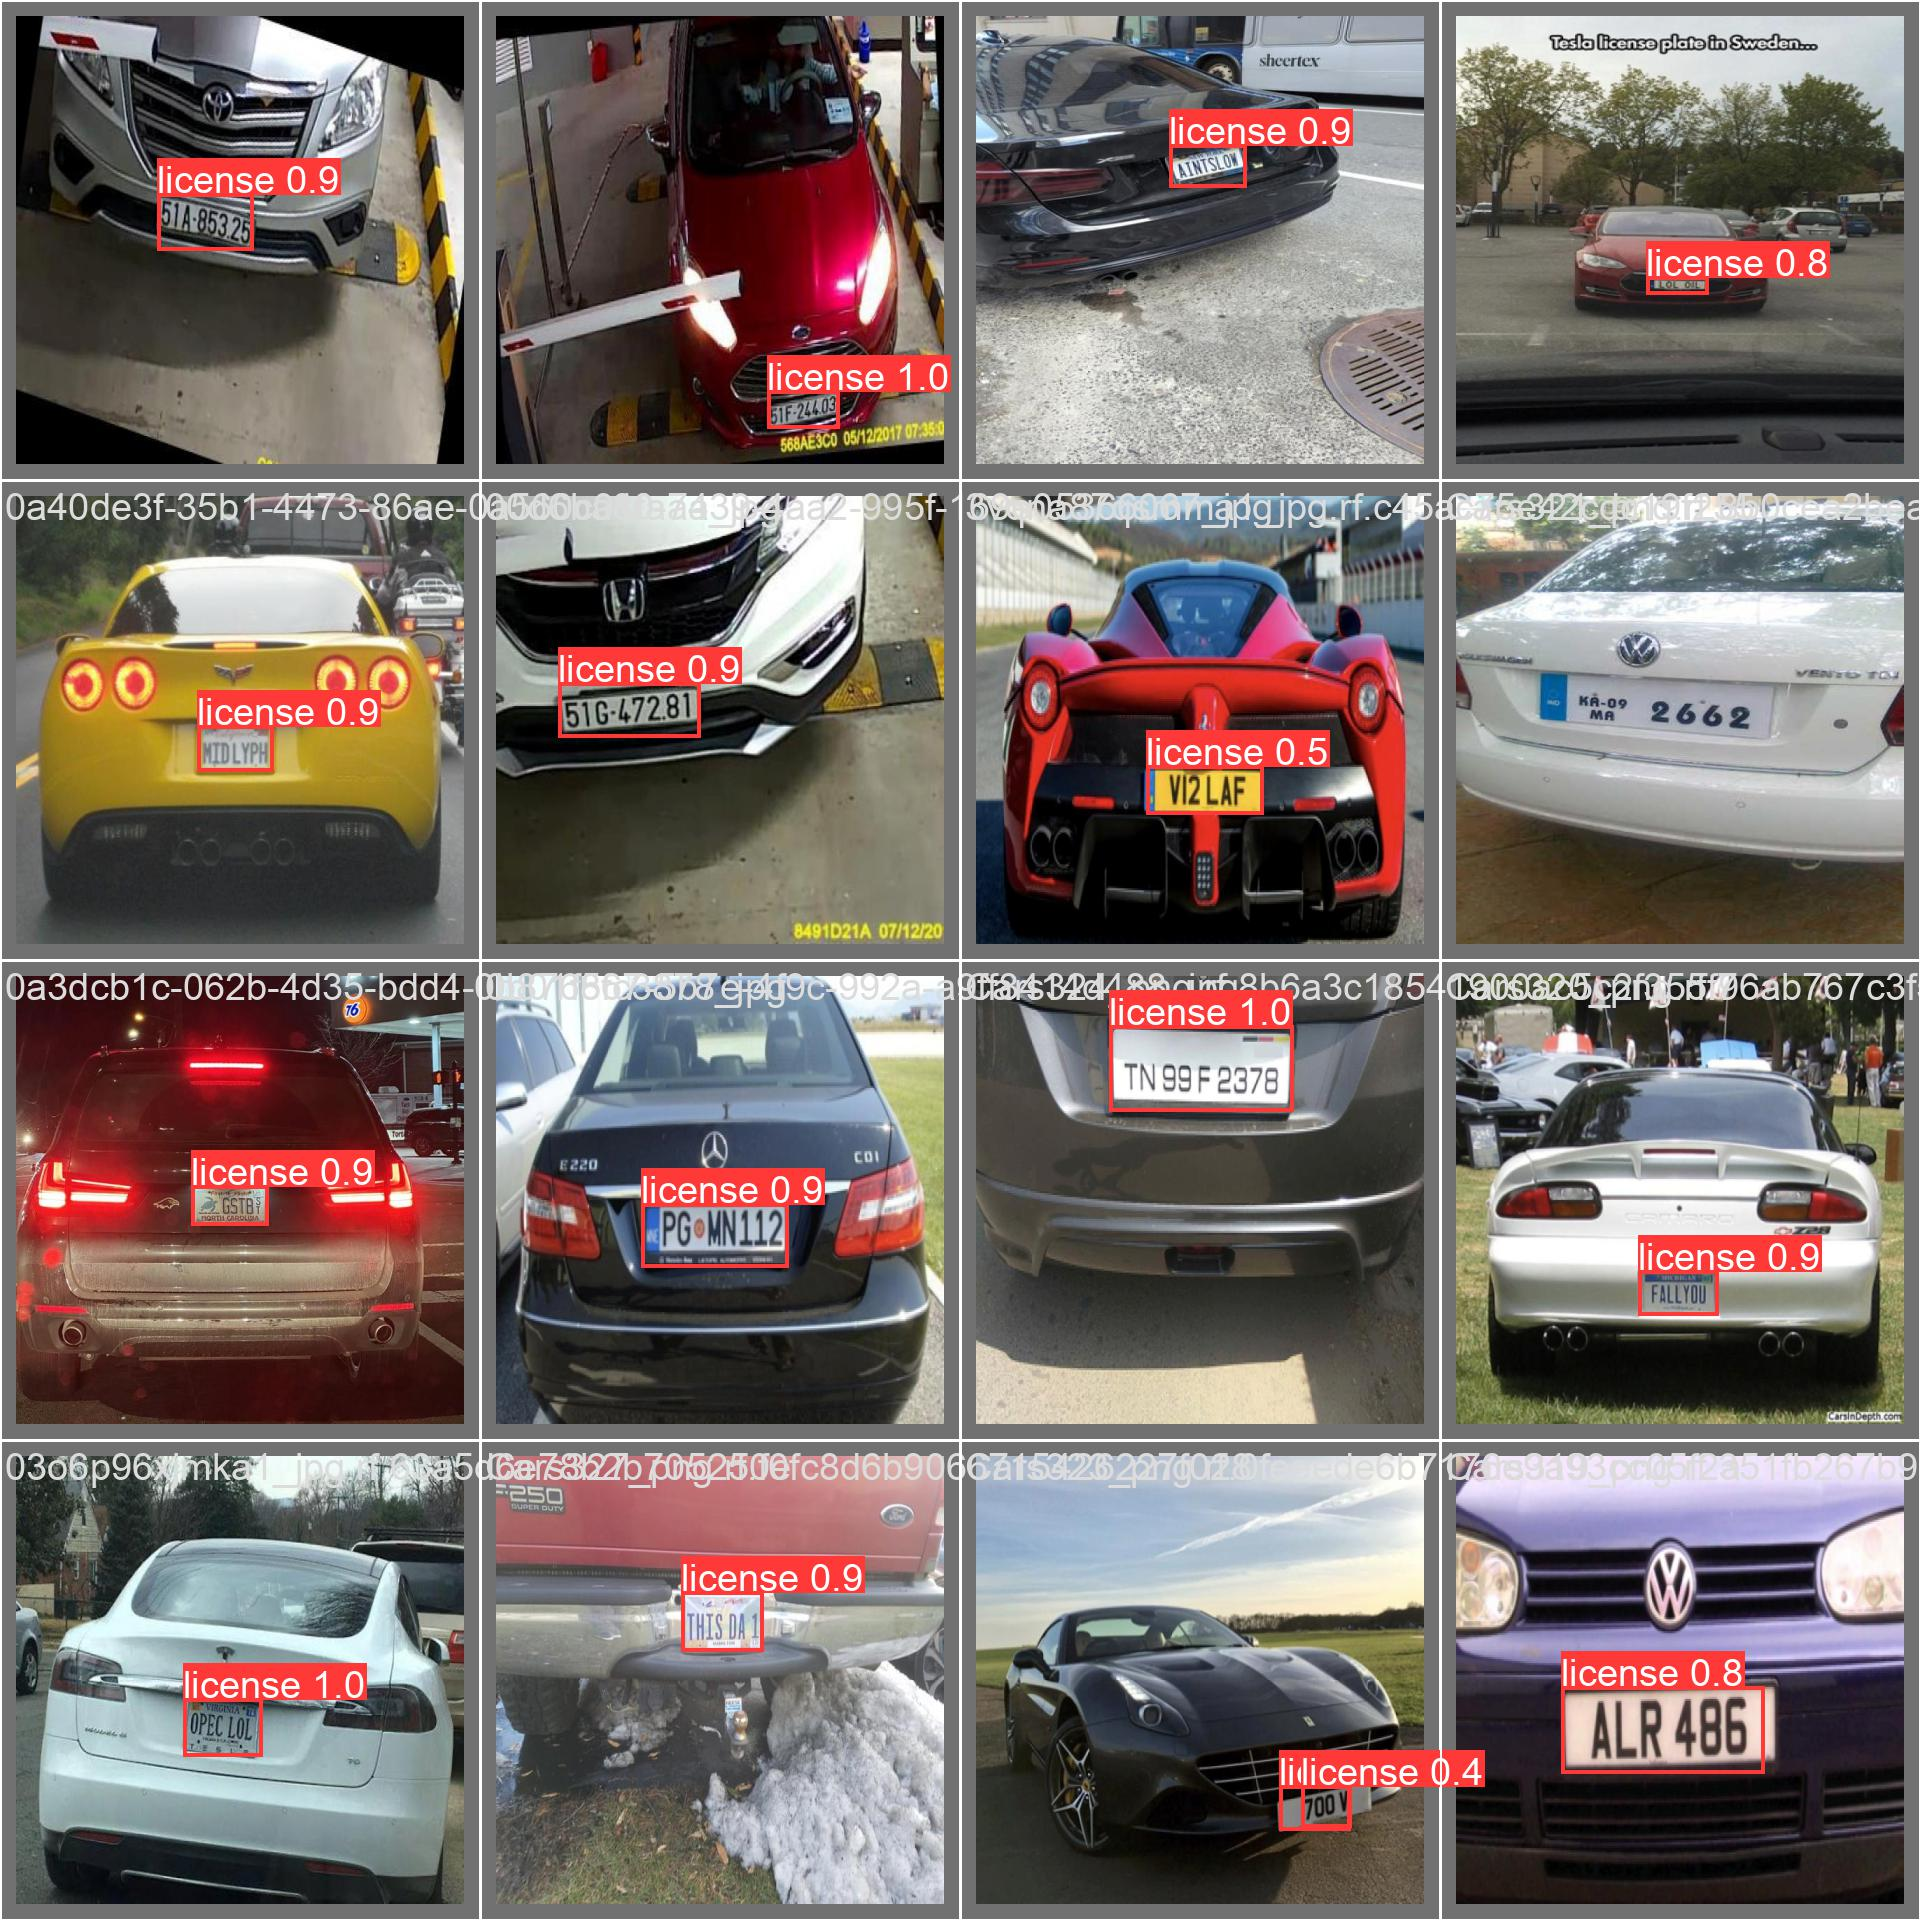

In [19]:
Image(filename=f'{HOME}/runs/detect/train3/val_batch2_pred.jpg', width=500)

In [22]:
source = 'thumb.jpg'

# Run inference on the source
results = model(source)  # list of Results objects

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


In [23]:
results

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[284.00000, 215.00000, 386.00000, 344.00000,   0.88273,   0.00000]], device='cuda:0')]

In [24]:
model.predict(source, save=True, imgsz=320, conf=0.5)

Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[284.00000, 205.00000, 386.00000, 350.00000,   0.92819,   0.00000]], device='cuda:0')]

In [29]:
import cv2
import os

In [30]:
classes = os.listdir("/content/runs/detect/predict")

In [31]:
classes

['thumb.jpg']

In [39]:
import matplotlib.pyplot as plt
from PIL import Image

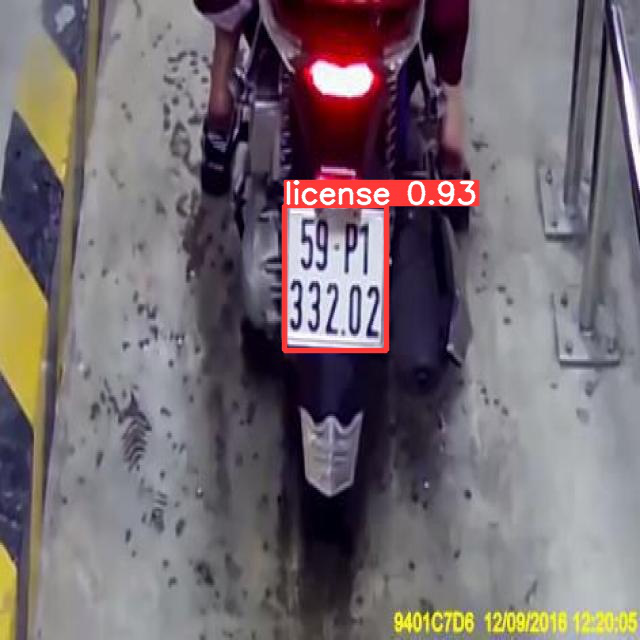

In [47]:

img_path = "/content/runs/detect/predict"+"/"+classes[0]
Image.open(img_path)

In [44]:
img_path

'/content/runs/detect/predict/thumb.jpg'

In [48]:
source = 'thumb2.jpg'

# Run inference on the source
results = model(source)  # list of Results objects

In [49]:
model.predict(source, save=True, imgsz=320, conf=0.5)

Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], device='cuda:0', size=(0, 6))]

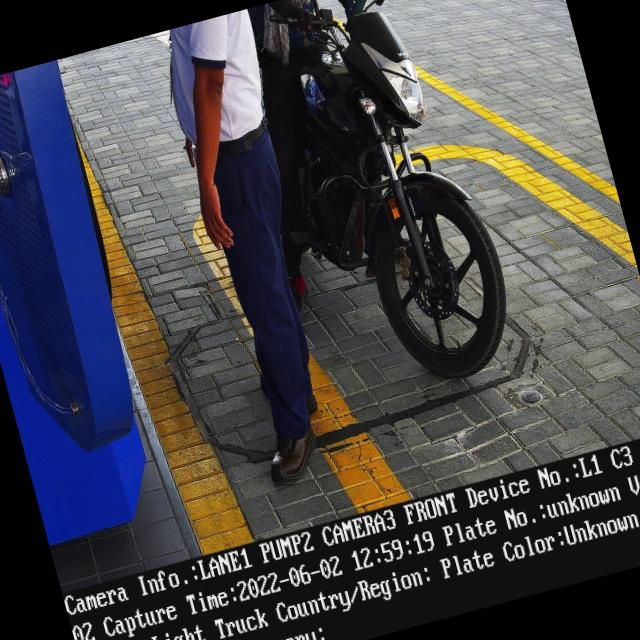

In [50]:
img_path = "/content/runs/detect/predict"+"/"+"thumb2.jpg"
Image.open(img_path)

In [54]:
model.export(format='onnx')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

PyTorch: starting from runs/detect/train3/weights/best.pt with output shape (1, 5, 4116) (5.9 MB)

ONNX: starting export with onnx 1.14.0...
ONNX: export success ✅ 0.7s, saved as runs/detect/train3/weights/best.onnx (11.6 MB)

Export complete (0.8s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo task=detect mode=predict model=runs/detect/train3/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=runs/detect/train3/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [63]:
model.export(format='openvino')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

PyTorch: starting from runs/detect/train3/weights/best.pt with output shape (1, 5, 4116) (5.9 MB)

ONNX: starting export with onnx 1.14.0...
ONNX: export success ✅ 1.3s, saved as runs/detect/train3/weights/best.onnx (11.6 MB)


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================




OpenVINO: starting export with openvino 2023.0.1-11005-fa1c41994f3-releases/2023/0...


[Errno 2] No such file or directory: '/usr/local/lib/python3.10/dist-packages/networkx-3.1.dist-info/METADATA'


OpenVINO: export success ✅ 2.5s, saved as runs/detect/train3/weights/best_openvino_model/ (11.7 MB)

Export complete (3.8s)
Results saved to /content/runs/detect/train3/weights
Predict:         yolo task=detect mode=predict model=runs/detect/train3/weights/best_openvino_model/ -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=detect mode=val model=runs/detect/train3/weights/best_openvino_model/ -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app
